# Image Classification
## Project Description – Image classification using CNNs in Keras

**Data Description**<br>
You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.

**Dataset**<br>
The dataset can be download from Olympus.
The data file names are:
+ images.npy
+ Label.csv <br>

The original files are from Kaggle. Due to the large volume of data, the images were converted to images.npy file and the labels are also put into the Labels.csv. So that you can work on the data/project seamlessly without worrying about the high data volume.

### The following code was used to convert the large dataset of images to numpy array:

```python
# Import necessary libraries.
import math
import numpy as np
import pandas as pd
from glob import glob
data_path = '/content/drive/My Drive/Colab Notebooks/data/plant_seedlings/train.zip'
!mkdir dataset
# Extract the files from dataset to temp_train and temp_test folders (as the dataset is a zip file.)
from zipfile import ZipFile
with ZipFile(data_path, 'r') as zip:
zip.extractall('./dataset')
path = "/content/dataset/*/*.*" # The path to all images in training set. (* means include all folder
s and files.)
files = glob(path)
trainImg = [] # Initialize empty list to store the image data as numbers.
trainLabel = [] # Initialize empty list to store the labels of images
j = 1
num = len(files)
# Obtain images and resizing, obtain labels
for img in files:
    '''
    Append the image data to trainImg list.
    Append the labels to trainLabel list.
    '''
print(str(j) + "/" + str(num), end="\r")
trainImg.append(cv2.resize(cv2.imread(img), (128, 128))) # Get image (with resizing to 128x128)
trainLabel.append(img.split('/')[-
2]) # Get image label (folder name contains the class to which the image belong)
j += 1
trainImg = np.asarray(trainImg) # Train images set
trainLabel = pd.DataFrame(trainLabel, columns=["Label"]) # Train labels set
print(trainImg.shape)
print(trainLabel.shape)
trainLabel.to_csv('Labels.csv', index=False)
np.save('plantimages', trainImg)
```

[Link to the Kaggle project site:](https://www.kaggle.com/c/plant-seedlings-classification/data?select=train)<br>
Note: For project purposes, download the data provided on Olympus.

**Context:**<br>
Can you differentiate a weed from a crop seedling?

The ability to do so effectively can mean better crop yields and better stewardship of the environment.

The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has
recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

**Learning Outcomes:**
- Pre-processing of image data.
- Visualization of images.
- Building CNN.
- Evaluate the Model.
- The motive of the project is to make the learners capable to handle images/image classification problems, during process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.

**Guide to solve the project seamlessly:**<br>
Here are the points which will help you to solve the problem efficiently:<br>
- Read the problem statement carefully from start to end (including the note at the end). The highlighted part in the attached problem statement should not be missed.
- Download the dataset from the Olympus platform.
- Upload the "images.npy" and “Labels.csv” file to google drive.
- Then you can use the dataset path in the Google Colab notebook to do further steps related to project problem statement.
- You can set runtime type to “GPU” in Google Colab, so that the code will run faster as you will be using CNN to fit your model.

**Steps and tasks:**
1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)
2. Data Pre-processing: (15 Marks) <br>
    a. Normalization. <br>
    b. Gaussian Blurring. <br>
    c. Visualize data after pre-processing. <br>
3. Make data compatible: (10 Marks) <br>
    a. Convert labels to one-hot-vectors. <br>
    b. Print the label for y_train[0]. <br>
    c. Split the dataset into training, testing, and validation set.<br> (Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5) <br>
    d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape. <br>
4. Building CNN: (15 Marks) <br>
    a. Define layers. <br>
    b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.) <br>
5. Fit and evaluate model and print confusion matrix. (10 Marks)
6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

Note:
- Download the train images from the Olympus Platform.
- Do not download the dataset from Kaggle, as:
    + The dataset is big.
    + The dataset has 2 files for train and test images, but the labels are only for the train file. Test file has no labels associated with it. So, when you want to know the accuracy of model on test images, there’s no way to measure it. That’s why the data provided to you on Olympus has only train images and their labels. For our purpose we use this for our training and testing and validation purpose.

Happy Learning!

# Steps and tasks:

## Load dataset and Summary

Import the libraries

In [1]:
!pip install keras

In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from skimage import data, io
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Activation  #importing different layers 
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import losses, optimizers

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import warnings
warnings.filterwarnings('ignore')  # Suppress warnings

%matplotlib inline

In [3]:
from google.colab.patches import cv2_imshow

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


load dataset

I made the next few steps so that I can keep this code on github.  Github doesn't allow for large files.

In [5]:
# # Already used this locally.  Just including here for visibility.
# """
# Use this to split numpy arrays to github-friendly sizes.
# (Need to make this less manual)
# """

# import numpy as np
# import os
# import math

# working_directory = 'C:\\Users\\Team Crazer\\Documents\\data_science_practice\\pgp_aiml\\private_pgp_aiml\\introduction_to_computer_vision\\project\\'
# file = 'images.npy'
# file_location = working_directory + file


# # Split file if too big.
# file_size = os.stat(file_location).st_size/(1024*1024)
# data = np.load(file_location)

# if file_size > 100:
#     min_splits = math.ceil(file_size / 100)
#     print("file needs to be split at least {} times.".format(min_splits))
#     # I need to make this step dynamic.  4 worked for this file,
#     #  but I need to set it up 
#     x1, x2, x3, x4 = np.dsplit(data, 4)
#     np.save(working_directory + "images1.npy", x1)
#     np.save(working_directory + "images2.npy", x2)
#     np.save(working_directory + "images3.npy", x3)
#     np.save(working_directory + "images4.npy", x4)
    
# else:
#     print("file is small enough that no splitting is necessary.")

In [6]:
# # This was used earlier locally, and this will be used again at the bottom of 
# # the notebook to clean things up.
# """
# Use this to delete large files.
# """
# import os

# working_directory = 'C:\\Users\\Team Crazer\\Documents\\data_science_practice\\pgp_aiml\\private_pgp_aiml\\introduction_to_computer_vision\\project\\'
# file = 'images.npy'
# file_location = working_directory + file


# # This step checks creates a list of what items need to be deleted.
# folder_contents = os.listdir()
# files_to_delete = []
# for item in folder_contents:
    
#     tmp_file_size = os.stat(item).st_size/(1024*1024)
#     print(item, "has file size", round(tmp_file_size, 2))
    
#     if tmp_file_size > 100:
#         print('\t', item, "will need to be deleted")
#         files_to_delete.append(item)

# # This step deletes files.
# for item in files_to_delete:
#     os.remove(item)
#     print(item, "has been removed.")

In [7]:
"""
Use this to rejoin numpy arrays.
(Need to make this dynamic instead of always 4).
Need to turn this into a function
"""
# import numpy as np

local_working_directory = 'C:\\Users\\Owner\\Documents\\data_science_practice\\pgp_aiml\\private_pgp_aiml\\introduction_to_computer_vision\\project\\'
colab_working_directory = '/content/drive/My Drive/'
working_directory = colab_working_directory
file_root = 'images'
file_ext = '.npy'

data1 = np.load(working_directory + file_root + '1' + file_ext)
data2 = np.load(working_directory + file_root + '2' + file_ext)
data3 = np.load(working_directory + file_root + '3' + file_ext)
data4 = np.load(working_directory + file_root + '4' + file_ext)

data_rejoined = np.dstack((data1, data2, data3, data4))

# # (Tested this against the original data)
# np.array_equal(data, data_rejoined)

np.save(working_directory + file_root + file_ext, data_rejoined)

In [8]:
my_data_color = np.load(working_directory + file_root + file_ext)  # 'images.npy'
my_labels = pd.read_csv(working_directory + 'Labels.csv')
my_data_grayscale = my_data_color.mean(axis=-1)
my_data = my_data_grayscale # I'll likely be working just with the grayscale images for ease of use.

print shape of data

In [9]:
print('data shape (color):', my_data_color.shape)

data shape (color): (4750, 128, 128, 3)


In [10]:
print('data shape:', my_data.shape)

data shape: (4750, 128, 128)


visualize the images in dataset

Text(0.5, 1.0, 'Small-flowered Cranesbill')

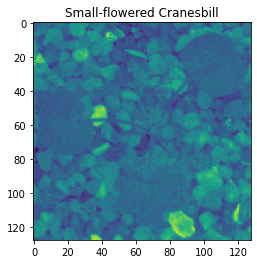

In [11]:
i = 1
img = my_data[i]
plt.imshow(img)
plt.title(my_labels.iloc[i][0])

Text(0.5, 1.0, 'Fat Hen')

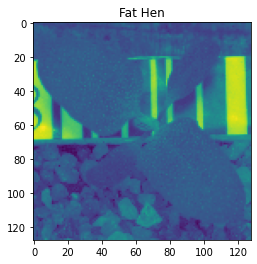

In [12]:
i = 500
img = my_data[i]
plt.imshow(img)
plt.title(my_labels.iloc[i][0])

Text(0.5, 1.0, 'Shepherds Purse')

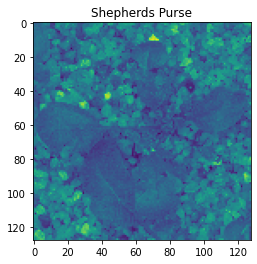

In [13]:
i = 1000
img = my_data[i]
plt.imshow(img)
plt.title(my_labels.iloc[i][0])

## Data Pre-processing
a. Normalization.

In [14]:
X = my_data.astype('float32') / 255.0

In [15]:
# changing "my_labels" to "y" while I'm changing "my_data" to "X".
y = my_labels

b. Gaussian Blurring.

In [16]:
blurred_image_array = np.empty(X.shape)

In [17]:
for idx in range(blurred_image_array.shape[0]):
  blurred_image = cv2.GaussianBlur(X[0,:,:], (3,3), 0)
  blurred_image_array[idx] = blurred_image

c. Visualize data after pre-processing.

Text(0.5, 1.0, 'Small-flowered Cranesbill')

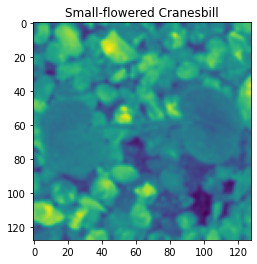

In [18]:
i = 0
img = blurred_image_array[i]
plt.imshow(img)
plt.title(my_labels.iloc[i][0])

Text(0.5, 1.0, 'Fat Hen')

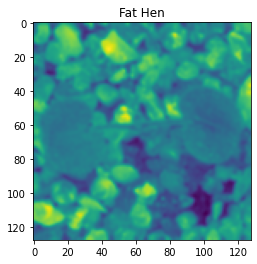

In [19]:
i = 500
img = blurred_image_array[i]
plt.imshow(img)
plt.title(my_labels.iloc[i][0])

Text(0.5, 1.0, 'Shepherds Purse')

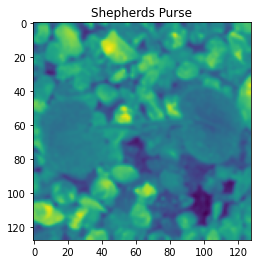

In [20]:
i = 1000
img = blurred_image_array[i]
plt.imshow(img)
plt.title(my_labels.iloc[i][0])

## Data Compatible for Modelling
a. Convert labels to one-hot-vectors.

In [21]:
y.sample(n=5)

,Label
1943,Common Chickweed
2464,Cleavers
1385,Common wheat
772,Fat Hen
3557,Sugar beet


In [22]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_encoded = enc.fit_transform(y)

In [23]:
print("y.shape: ", y.shape)
print("y_encoded.shape: ", y_encoded.shape)

y.shape:  (4750, 1)
y_encoded.shape:  (4750, 12)


b. Print the label for y_train[0].

In [24]:
y_encoded[0,:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

c. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)

**(In the discussion forum, we were told just to do a two-way split.  I'm not sure if it's supposed to be 50-50 or 70-30.  Going for 70-30 here.)**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(blurred_image_array, y_encoded, train_size = .7, random_state = 26)

d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

In [26]:
print("X_train.shape: ", X_train.shape) 
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (3325, 128, 128)
X_test.shape:  (1425, 128, 128)
y_train.shape:  (3325, 12)
y_test.shape:  (1425, 12)


In [27]:
my_batch_input_shape = list(X_train.shape)
my_batch_input_shape.append(1)
my_batch_input_shape

[3325, 128, 128, 1]

## Building CNN:
a. Define layers.

In [28]:
# Initialising the CNN classifier
classifier = Sequential()

# Add another layer that is an input layer that is not the Conv2D

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), batch_input_shape = my_batch_input_shape, activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# # Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# # Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# # Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'valid'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.5
classifier.add(Dropout(0.5))

# Adding a fully connected layer with 128 neurons
classifier.add(Dense(units = 128, activation = 'relu'))

# The final output layer with 10 neurons to predict the categorical classifcation
classifier.add(Dense(units = 12, activation = 'softmax'))

In [29]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (3325, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (3325, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (3325, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (3325, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (3325, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (3325, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (3325, 7200)              0

b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

In [30]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Modelling and Evaluation
Fit model

In [ ]:
classifier.fit(x=X_train, y=y_train,
             steps_per_epoch=int(1098/32),
             verbose=1,
             epochs = 10,
             validation_data = (X_test, y_test),
             validation_steps = int(272/32)
             )

In [31]:
try:
  classifier.fit(x=X_train, y=y_train,
               steps_per_epoch=int(1098/32),
               verbose=1,
               epochs = 10,
               validation_data = (X_test, y_test),
               validation_steps = int(272/32)
               )

except:
  msg = """\nMODEL FAILED TO LAUNCH:
I took my code from "CV_practice_exercise_week_2_answers," but I know so little
about Convolutional Neural Networks that I can't figure out how to modify it to
get my model across the finish line.  I'm essentially going to turn this project
in half-completed and will have to come back on my own time after my time with
Great Learning is over and really learn CNNs.  It ain't happening tonight.

See you in NLP.
        """
  print(msg)

Epoch 1/10

MODEL FAILED TO LAUNCH:
I took my code from "CV_practice_exercise_week_2_answers," but I know so little
about Convolutional Neural Networks that I can't figure out how to modify it to
get my model across the finish line.  I'm essentially going to turn this project
in half-completed and will have to come back on my own time after my time with
Great Learning is over and really learn CNNs.  It ain't happening tonight.

See you in NLP.
        


In [32]:
#I took my code from "CV_practice_exercise_week_2_answers," but I know so little about Convolutional Neural Networks that I can't figure out how to modify it to get my model across the finish line.

# I'm essentially going to turn this project in half-completed and will have to come back on my own time after my time with Great Learning is over and really learn CNNs.  It ain't happening tonight.

#  See you in NLP.

Evaluate model

In [33]:
# Unable to finish

print confusion matrix.

In [34]:
print("I am completely confused.")

I am completely confused.


## Visualize Predictions
for x_test[2]

In [35]:
# None

for x_test[3]

In [36]:
# None

for x_test[33]

In [37]:
# None

for x_test[36]

In [38]:
# None

for x_test[59]

In [39]:
# None

In [40]:
# Cleaning up the large file.
"""
Use this to delete large files.
"""
import os

working_directory = 'C:\\Users\\Team Crazer\\Documents\\data_science_practice\\pgp_aiml\\private_pgp_aiml\\introduction_to_computer_vision\\project\\'
file = 'images.npy'
file_location = working_directory + file


# This step checks creates a list of what items need to be deleted.
folder_contents = os.listdir()
files_to_delete = []
for item in folder_contents:
    
    tmp_file_size = os.stat(item).st_size/(1024*1024)
    print(item, "has file size", round(tmp_file_size, 2))
    
    if tmp_file_size > 100:
        print('\t', item, "will need to be deleted")
        files_to_delete.append(item)

# This step deletes files.
for item in files_to_delete:
    os.remove(item)
    print(item, "has been removed.")

.config has file size 0.0
drive has file size 0.0
sample_data has file size 0.0


**Scoring guide (Rubric) - Image Classification**

| <u> Criteria </u>  | <u> Points </u> |
|-----------| ---------|
| <center><b> Load dataset and Summary </b></center>| 5 |
| <center><b> Data Pre-processing </b></center>     | 15|
| <center><b> Data Compatible for Modelling </b></center>| 10 |
| <center><b> Build CNN </b></center> | 15 |
| <center><b> Modelling and Evaluation </b></center>| 10 |
| <center><b> Visualize Predictions </b></center>| 5 |
|Total Points | 60 |